<a href="https://colab.research.google.com/github/jphall663/GWU_ML/blob/main/notebook/lecture_10/iris_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# License 
***
Copyright (C) 2017-2022 J. Patrick Hall, jphall@gwu.edu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

***
# Simple feature extraction with PCA - numpy and scikit-Learn

#### Imports 

In [1]:
# numpy for matrix operations
import numpy as np

# matplotlib for plotting
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
%matplotlib inline

# scikit for data set and easy standardization
from sklearn import datasets
from sklearn import preprocessing

#### Load 4-dimensional iris data set 
* 4 dimensions is too many to plot

In [2]:
print('Input features: \n', datasets.load_iris().feature_names)
print()
print('Target classes: \n', datasets.load_iris().target_names)

# load and standardize data
iris = datasets.load_iris().data
iris = preprocessing.scale(iris)
species = datasets.load_iris().target

Input features: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target classes: 
 ['setosa' 'versicolor' 'virginica']


#### Create symmetrical covariance matrix for PCA 
Covariance $C_{i,j}$ measures the amount one feature $x_i$ changes with another feature $x_j$ for all the features $j$ in the data set $X$.

\begin{equation}
C_{i, j} = \frac{1}{N} x_i x_j, \text{  }  x_i, x_j \in X_j
\end{equation}

In [3]:
covariance_matrix = np.cov(iris, rowvar=False)
print('Covariance Matrix:\n', covariance_matrix)        

Covariance Matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


#### Eigen decomposition (a very important type of matrix factorization in machine learning)
Eigen decomposition of a covariance or correlation matrix is known as principal components analysis (PCA). Eigen decomposition involves calculating two matrices $\mathbf{Q}$ and $\mathbf{\Lambda}$, such that the covariance or correlation matrix $\mathbf{C} = \mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^{-1}$, where $\mathbf{Q}$ is a *p* x *p* matrix of *eigenvectors* and $\mathbf{\Lambda}$ is a diagonal, *p* x *p* matrix of *eigenvalues*. Eigenvectors are orthogonal vectors in the directions of the highest variance in the data matrix. Eigenvalues determine the length of the eigenvectors and eigenvectors are ranked by the magnitude of their corresponsing eigenvalue. The eigenvalue with the largest magnitude corresponds to the eigenvector which spans the direction of the highest variance in the original data set and so on.


**Eigen decomposition** 
\begin{equation}
\mathbf{C} = \mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^{-1}
\end{equation}
\begin{equation}
\mathbf{C}\mathbf{Q} = \mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^{-1}\mathbf{Q}
\end{equation}
\begin{equation}
\mathbf{C}\mathbf{Q} = \mathbf{Q}\mathbf{\Lambda}
\end{equation}

The above equation can be decomposed in sets of simultaneous equations. For *any* eigenvector, $\mathbf{q}_j$:

\begin{equation}
\mathbf{C}\mathbf{q}_j = \mathbf{q}_j\lambda_j
\end{equation}

\begin{equation}
\mathbf{C}\mathbf{q}_j = \lambda_j\mathbf{q}_j
\end{equation}

\begin{equation}
\mathbf{C}\mathbf{q}_j - \lambda_j\mathbf{q}_j = 0
\end{equation}

\begin{equation}
(\mathbf{C} - \lambda_j\mathbf{I})\mathbf{q}_j = 0
\end{equation}

Because $\mathbf{q}$ comes from the non-singular matrix of eigenvectors, $(\mathbf{C} - \lambda_j\mathbf{I})$, and thus $det(\mathbf{C} - \lambda\mathbf{I})$, must equal 0. Which implies a polynomial equation in which roots $\lambda_{j}$ can be determined using:

\begin{equation}
\prod_{j} (\mathbf{c}_{j,j} - \lambda_{j}) = 0, \text{for } j \leq p
\end{equation}

Once all $\lambda_{j}$, and hence $\mathbf{\Lambda}$, have been determined, $\mathbf{Q}$ can also be determined by back-solving for the columns of $\mathbf{Q}$ using $(\mathbf{C} - \lambda_j\mathbf{I})\mathbf{q}_j = 0$.

#### Use numpy to find eigenvalues and eigenvectors
* Numpy ranks eigenvectors by their correct magnitude automatically.

In [4]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print('Eigen Values:\n', eigen_values) 
print()
print('Eigen Vectors:\n', eigen_vectors)  

Eigen Values:
 [2.93808505 0.9201649  0.14774182 0.02085386]

Eigen Vectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


#### Use eigenvectors to perform feature extraction

The original data $\mathbf{X}$ can be projected onto the new space defined by the eigenvectors $\mathbf{Q}$ using the dot product $\mathbf{XQ}$. These new vectors are known as the *principal components* of $\mathbf{X}$.

Using a reduced set of *n* eigenvectors (i.e. the first *n* columns of $Q$) to carry out the dot product $\mathbf{XQ_{n}}$, will result in a compressed, *n*-dimensional representation of $\mathbf{X}$ in which the proportion of total variance has been maximized.

#### Extract two features and plot
* We could not plot the four dimensions in the data set easily before performing PCA

In [5]:
two_PCs = iris.dot(eigen_vectors[:, :2])

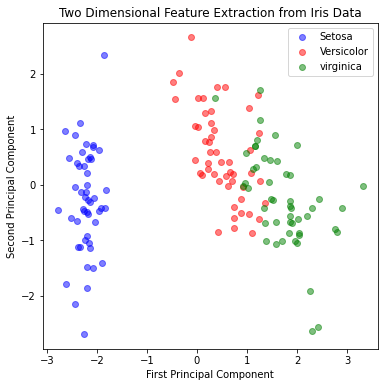

In [6]:
fig = plt.figure(figsize=(6,6))
setosa = plt.scatter(two_PCs[0:50, 0], two_PCs[0:50, 1], alpha=0.5, color='blue')
versicolor = plt.scatter(two_PCs[50:100, 0], two_PCs[50:100, 1], alpha=0.5, color='red')
virginica = plt.scatter(two_PCs[100:150, 0], two_PCs[100:150, 1], alpha=0.5, color='green')
plt.title('Two Dimensional Feature Extraction from Iris Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend([setosa, versicolor, virginica], ['Setosa', 'Versicolor', 'virginica'])
plt.show()

#### Extract three features and plot

In [7]:
three_PCs = iris.dot(eigen_vectors[:, :3])

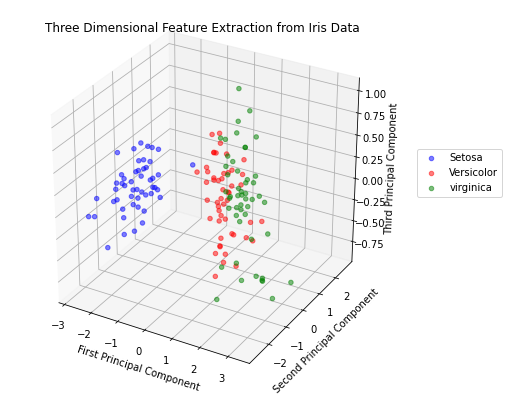

In [8]:
fig = plt.figure(figsize=(7,  7))
ax = plt.axes(projection='3d')

setosa = ax.scatter(three_PCs [0:50, 0], three_PCs [0:50, 1], three_PCs [0:50, 2], alpha=0.5, color='blue')
versicolor = ax.scatter(three_PCs [50:100, 0], three_PCs [50:100, 1], three_PCs [50:100, 2], alpha=0.5, color='red')
virginica = ax.scatter(three_PCs [100:150, 0], three_PCs [100:150, 1], three_PCs [100:150, 2], alpha=0.5, color='green')

plt.title('Three Dimensional Feature Extraction from Iris Data')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

plt.legend([setosa, versicolor, virginica], ['Setosa', 'Versicolor', 'virginica'], bbox_to_anchor=(1.05, 0.5), loc=3,
                   borderaxespad=0.)

_ = plt.show()